# PARTIE 1 : Exploration et Analyse des Données

## Question 1.1 : Chargement et Inspection Initiale

**Objectif :**  
Charger les données, vérifier leur intégrité technique et obtenir une première vision de la distribution des variables clés sans inclure les données non-pertinentes comme les identifiants.


In [2]:
import pandas as pd
import numpy as np

# Configuration pour l'affichage des colonnes dans la console
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

def load_and_inspect(file_path):
    """
    Charge le dataset et effectue une inspection initiale rigoureuse.
    """
    # Chargement des données
    df = pd.read_csv(file_path)
    
    # 1. Nettoyage immédiat : suppression de l'ID client pour les statistiques
    # On le garde dans une variable si besoin, mais on l'exclut de l'analyse statistique
    df_stats = df.drop(columns=['id_client'])
    
    print("=== APERÇU DES DONNÉES (5 premières lignes) ===")
    print(df.head())
    
    print("\n=== STRUCTURE ET TYPES DE DONNÉES ===")
    print(df.info())
    
    # Séparation des colonnes pour une analyse pertinente
    cols_numeriques = df_stats.select_dtypes(include=[np.number]).columns.tolist()
    cols_categoriques = df_stats.select_dtypes(exclude=[np.number]).columns.tolist()
    
    print("\n=== STATISTIQUES DESCRIPTIVES (Variables Quantitatives) ===")
    # On se concentre sur les variables où la moyenne/médiane a un sens métier
    print(df[cols_numeriques].describe().T) # .T pour une meilleure lisibilité (Transposée)
    
    print("\n=== VÉRIFICATION DES VALEURS MANQUANTES ===")
    missing_values = df.isnull().sum()
    print(missing_values[missing_values > 0] if missing_values.sum() > 0 else "Aucune valeur manquante détectée.")
    
    return df, cols_numeriques, cols_categoriques

# Exécution de la fonction
df, numeric_cols, categorical_cols = load_and_inspect('dataset_bancaire.csv')

=== APERÇU DES DONNÉES (5 premières lignes) ===
   id_client  age       ville    profession situation_familiale  nbr_enfants  salaire_mensuel  epargne_totale  nbr_credits_actifs  anciennete_banque_mois  transactions_mois  utilisation_app_mobile  montant_moyen_transaction  score_credit  risque_defaut
0          1   60  Casablanca  Entrepreneur         Célibataire            3      2500.000000    94784.617547                 3.0                      90                 22                       1                 827.346889         850.0              1
1          2   50         Fès     Ingénieur         Célibataire            1     14953.009438   103132.218320                 1.0                     108                 25                       0                1635.972493         850.0              0
2          3   36     Tétouan  Entrepreneur            Veuf(ve)            1      7905.524504    22818.940732                 1.0                     190                 23                     

## Question 1.2 : Analyse Univariée

**Objectif :**  
Visualiser la répartition des variables clés (numériques et catégorielles) et identifier les valeurs aberrantes susceptibles de fausser les futurs modèles.


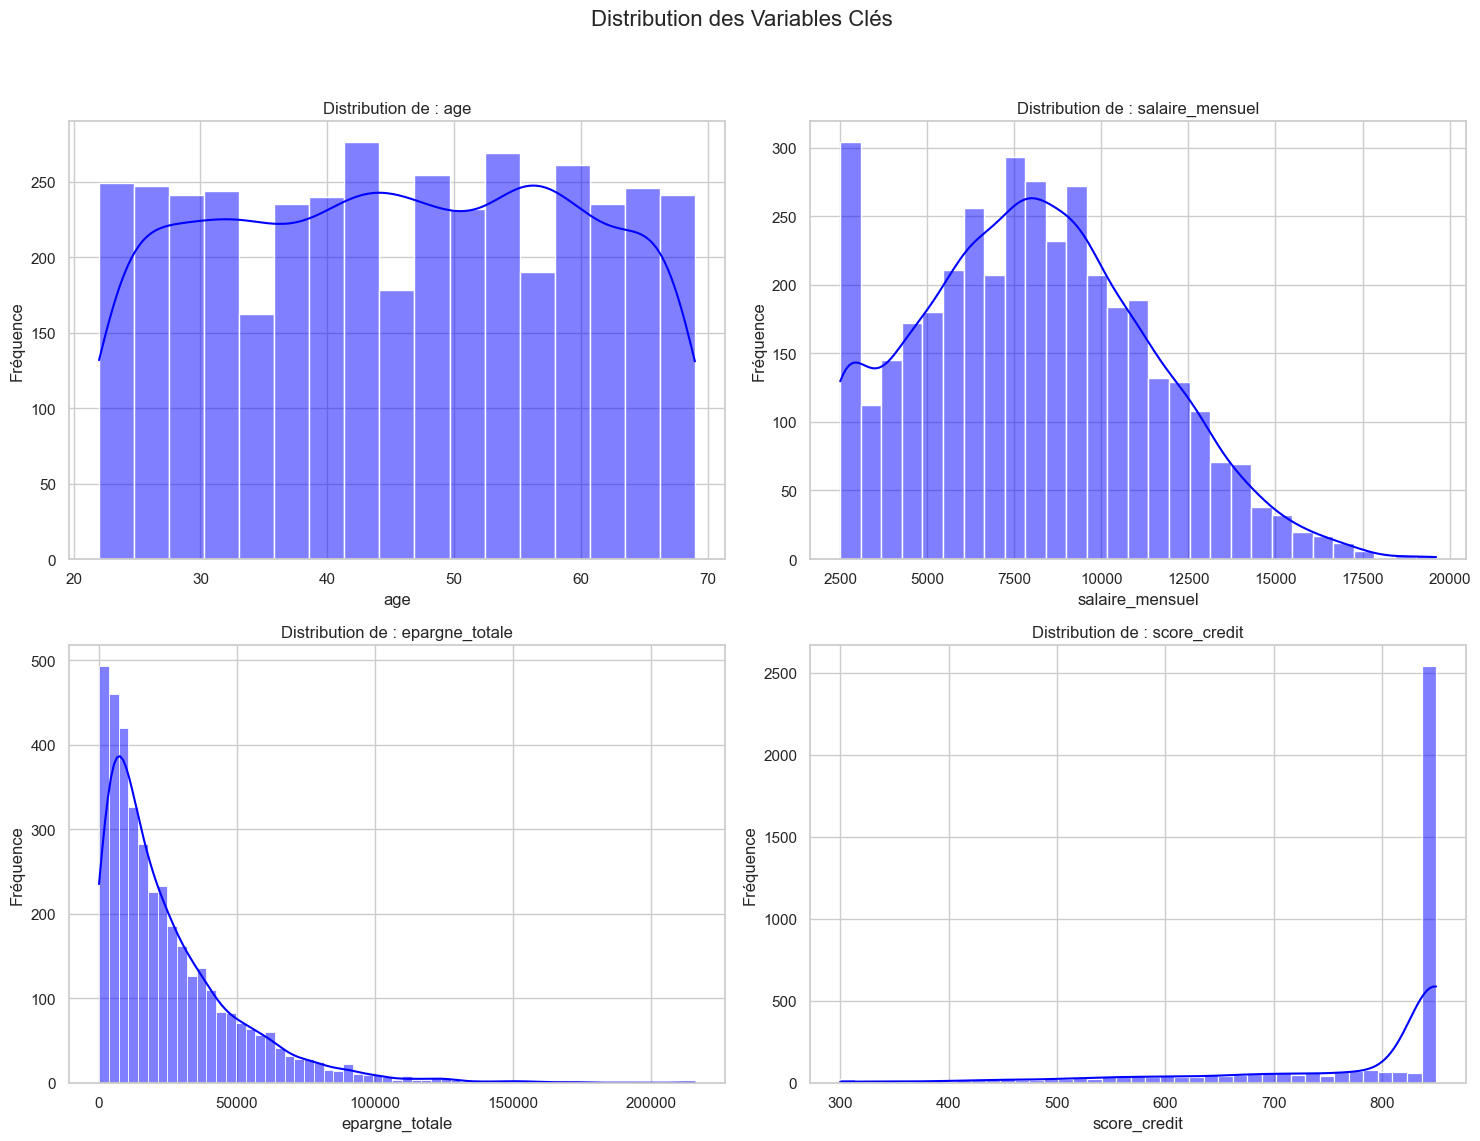

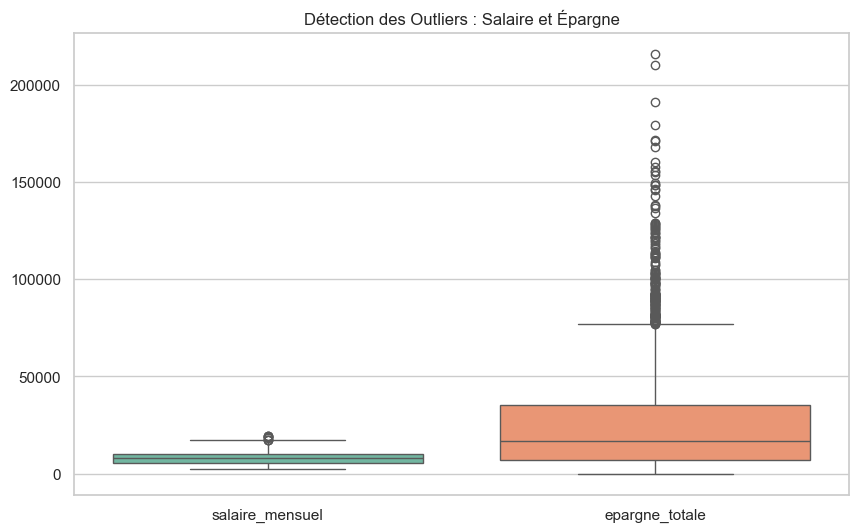

C:\Users\lenovo\AppData\Local\Temp\ipykernel_29032\1210781130.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='risque_defaut', data=df, ax=axes[0], palette='viridis')
C:\Users\lenovo\AppData\Local\Temp\ipykernel_29032\1210781130.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='profession', data=df, ax=axes[1], palette='magma',


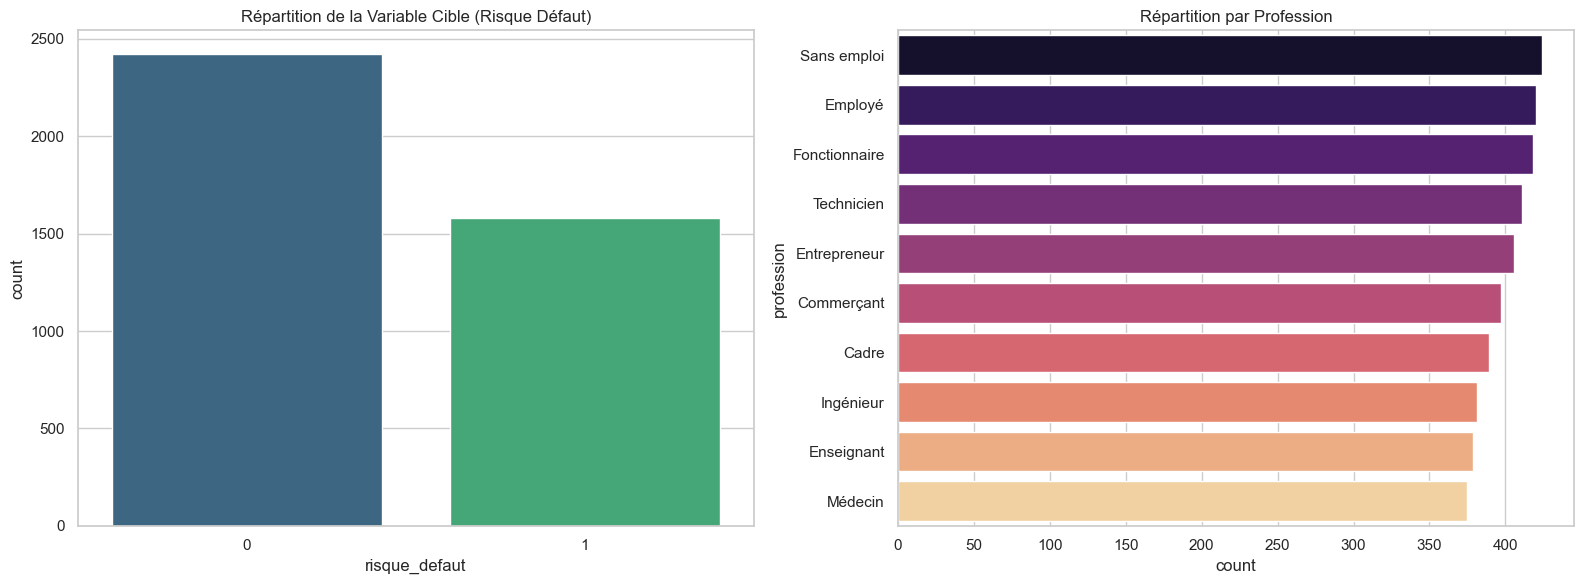

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration esthétique des graphiques
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

def univariate_analysis(df):
    """
    Réalise l'analyse univariée : histogrammes, boxplots et diagrammes en barres.
    """
    
    # --- A. DISTRIBUTION DES VARIABLES NUMÉRIQUES ---
    cols_to_plot = ['age', 'salaire_mensuel', 'epargne_totale', 'score_credit']
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle('Distribution des Variables Clés', fontsize=16)
    
    for i, col in enumerate(cols_to_plot):
        row, c = i // 2, i % 2
        sns.histplot(df[col], kde=True, ax=axes[row, c], color='blue')
        axes[row, c].set_title(f'Distribution de : {col}')
        axes[row, c].set_ylabel('Fréquence')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

    # --- B. DÉTECTION DES OUTLIERS (BOXPLOTS) ---
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df[['salaire_mensuel', 'epargne_totale']], palette="Set2")
    plt.title('Détection des Outliers : Salaire et Épargne')
    plt.show()

    # --- C. ANALYSE DES VARIABLES CATÉGORIELLES ---
    # On regarde la répartition du risque (Variable Cible) et des professions
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Répartition du risque de défaut
    sns.countplot(x='risque_defaut', data=df, ax=axes[0], palette='viridis')
    axes[0].set_title('Répartition de la Variable Cible (Risque Défaut)')
    
    # Répartition des professions (Top 10)
    sns.countplot(y='profession', data=df, ax=axes[1], palette='magma', 
                  order=df['profession'].value_counts().index)
    axes[1].set_title('Répartition par Profession')

    plt.tight_layout()
    plt.show()

# Exécution de l'analyse
univariate_analysis(df)

## Question 1.3 : Analyse Bivariée

**Objectif :**  
Étudier la relation entre les caractéristiques des clients et la probabilité de défaut à l’aide de **corrélations**, de **boxplots comparatifs** et de **tableaux croisés**.


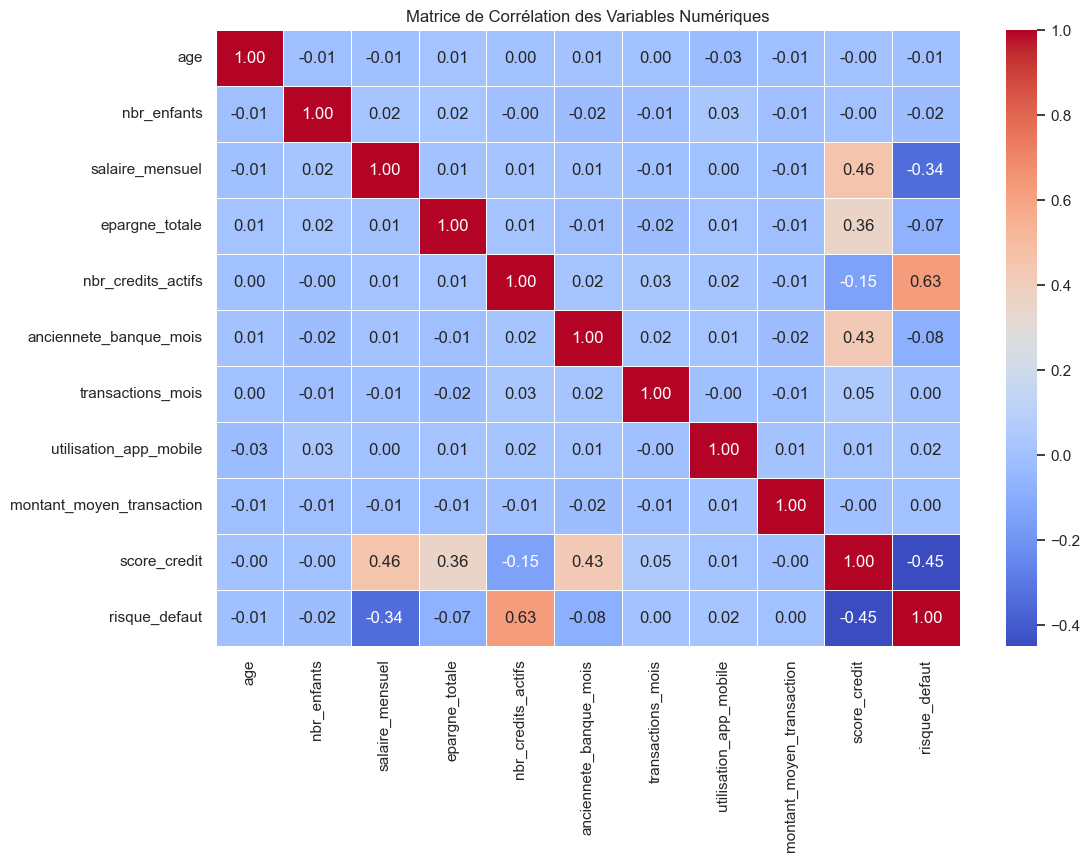

C:\Users\lenovo\AppData\Local\Temp\ipykernel_29032\3415708289.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='risque_defaut', y='score_credit', data=df, ax=axes[0], palette='Set1')
C:\Users\lenovo\AppData\Local\Temp\ipykernel_29032\3415708289.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='risque_defaut', y='salaire_mensuel', data=df, ax=axes[1], palette='Set2')


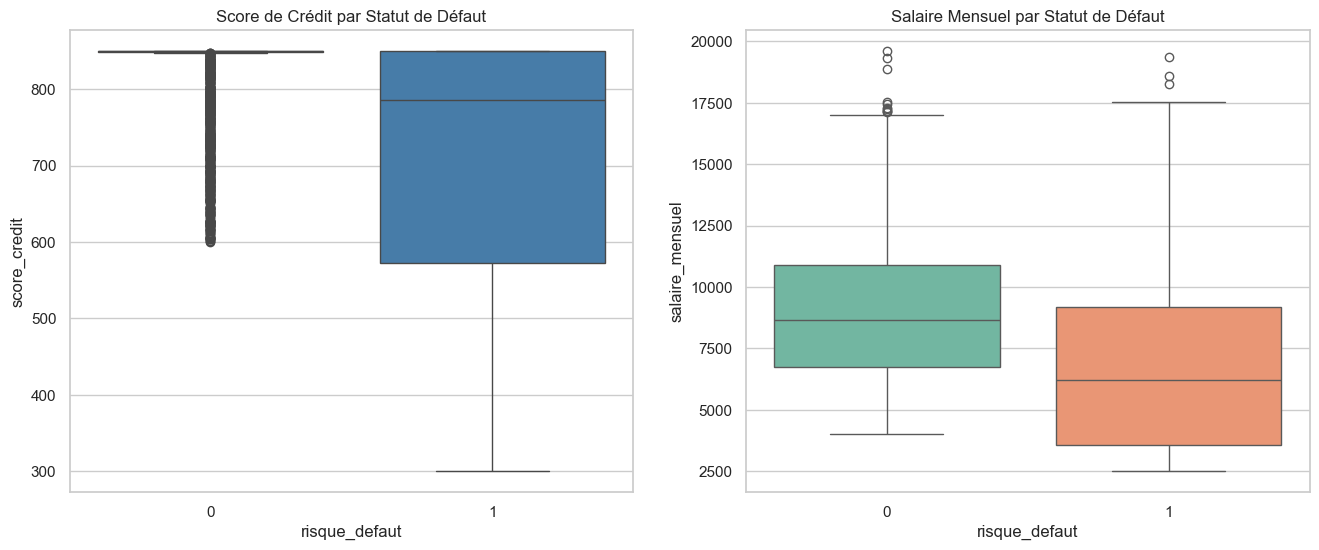

C:\Users\lenovo\AppData\Local\Temp\ipykernel_29032\3415708289.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_risk.index, y=city_risk.values, palette='Reds_r')


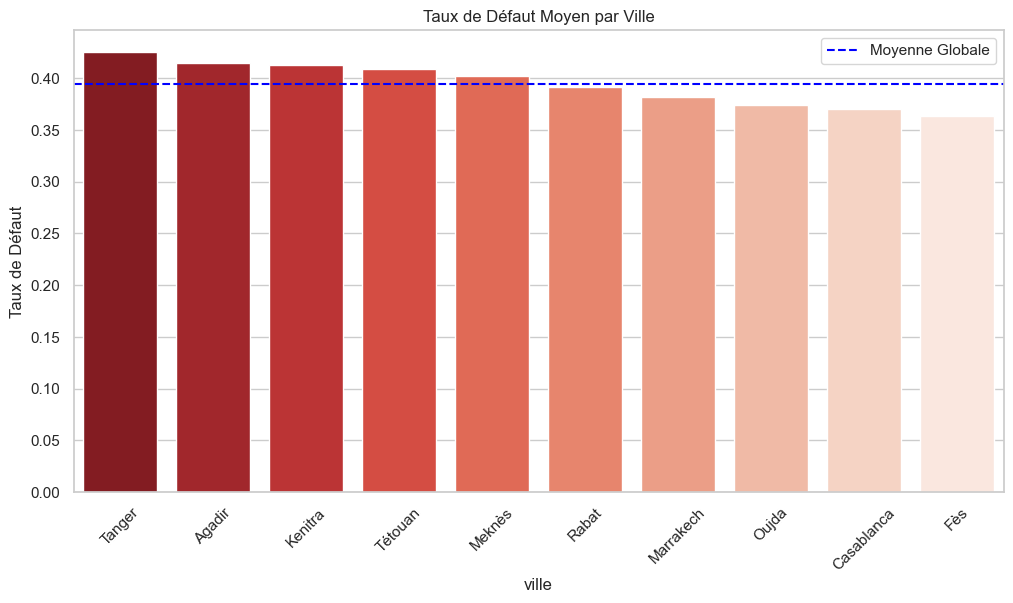

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

def bivariate_analysis(df):
    """
    Analyse la relation entre les variables explicatives et la variable cible (risque_defaut).
    """
    
    # --- A. MATRICE DE CORRÉLATION ---
    # On ne garde que les colonnes numériques pour la corrélation
    cols_num = df.select_dtypes(include=[np.number]).drop(columns=['id_client'])
    corr_matrix = cols_num.corr()
    
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title('Matrice de Corrélation des Variables Numériques')
    plt.show()

    # --- B. IMPACT DU SCORE DE CRÉDIT ET DU SALAIRE SUR LE RISQUE ---
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Score de crédit vs Risque
    sns.boxplot(x='risque_defaut', y='score_credit', data=df, ax=axes[0], palette='Set1')
    axes[0].set_title('Score de Crédit par Statut de Défaut')
    
    # Salaire mensuel vs Risque
    sns.boxplot(x='risque_defaut', y='salaire_mensuel', data=df, ax=axes[1], palette='Set2')
    axes[1].set_title('Salaire Mensuel par Statut de Défaut')
    
    plt.show()

    # --- C. ANALYSE DES VARIABLES CATÉGORIELLES (Taux de défaut par Ville) ---
    plt.figure(figsize=(12, 6))
    # Calcul du taux de défaut moyen par ville
    city_risk = df.groupby('ville')['risque_defaut'].mean().sort_values(ascending=False)
    sns.barplot(x=city_risk.index, y=city_risk.values, palette='Reds_r')
    plt.axhline(df['risque_defaut'].mean(), color='blue', linestyle='--', label='Moyenne Globale')
    plt.title('Taux de Défaut Moyen par Ville')
    plt.ylabel('Taux de Défaut')
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()

# Exécution de l'analyse
bivariate_analysis(df)

## Question 1.4 : Préparation des Données

**Objectif :**  
Nettoyer le dataset, traiter les valeurs manquantes, encoder les variables textuelles et préparer la **séparation des données** pour les phases de modélisation.


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

def preprocess_data(df):
    """
    Nettoie et prépare les données pour la modélisation.
    """
    df_clean = df.copy()

    # --- A. SUPPRESSION DES COLONNES INUTILES ---
    # L'ID client n'apporte aucune information prédictive
    if 'id_client' in df_clean.columns:
        df_clean = df_clean.drop(columns=['id_client'])

    # --- B. TRAITEMENT DES VALEURS MANQUANTES ---
    # Pour les colonnes numériques : Imputation par la médiane (plus robuste aux outliers)
    num_cols = df_clean.select_dtypes(include=[np.number]).columns
    for col in num_cols:
        if df_clean[col].isnull().any():
            df_clean[col] = df_clean[col].fillna(df_clean[col].median())

    # Pour les colonnes catégorielles : Imputation par le mode (valeur la plus fréquente)
    cat_cols = df_clean.select_dtypes(exclude=[np.number]).columns
    for col in cat_cols:
        if df_clean[col].isnull().any():
            df_clean[col] = df_clean[col].fillna(df_clean[col].mode()[0])

    # --- C. ENCODAGE DES VARIABLES CATÉGORIELLES ---
    # Transformation du texte en nombres pour le modèle
    le = LabelEncoder()
    for col in cat_cols:
        df_clean[col] = le.fit_transform(df_clean[col])
        print(f"Encodage réussi pour : {col}")

    # --- D. SÉPARATION DES DONNÉES (TRAIN / TEST) ---
    # X = Variables explicatives, y = Variable cible (risque_defaut)
    X = df_clean.drop('risque_defaut', axis=1)
    y = df_clean['risque_defaut']

    # On garde 20% des données pour le test final (évaluation)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    print("\nDimensions des datasets :")
    print(f"Entraînement : {X_train.shape} | Test : {X_test.shape}")
    
    return X_train, X_test, y_train, y_test, df_clean

# Exécution du prétraitement
X_train, X_test, y_train, y_test, df_p1_final = preprocess_data(df)

Encodage réussi pour : ville
Encodage réussi pour : profession
Encodage réussi pour : situation_familiale

Dimensions des datasets :
Entraînement : (3200, 13) | Test : (800, 13)


# PARTIE 2 : Modélisation et Prédiction

## Question 2.1 : Mise en place de la Régression Logistique

**Objectif :**  
Établir un **modèle de référence (baseline)** simple et interprétable.  
La **Régression Logistique** est le standard dans le secteur bancaire pour le **scoring de crédit**.


=== RAPPORT DE CLASSIFICATION : RÉGRESSION LOGISTIQUE ===
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       484
           1       0.85      0.85      0.85       316

    accuracy                           0.88       800
   macro avg       0.88      0.88      0.88       800
weighted avg       0.88      0.88      0.88       800



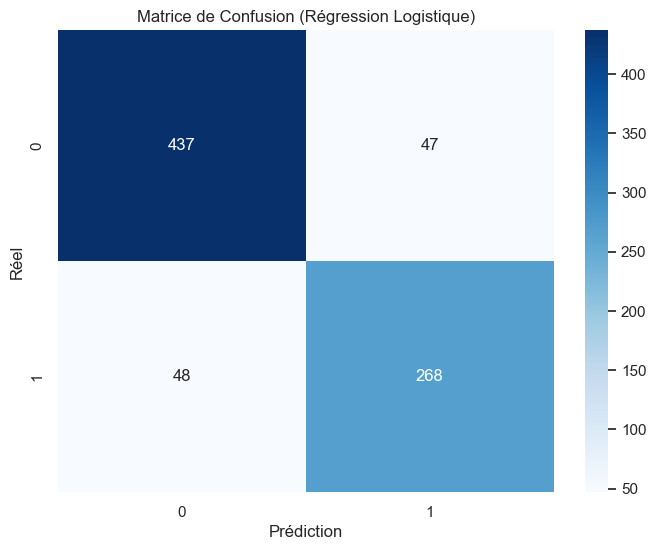

Score ROC-AUC : 0.9497


In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

def train_logistic_regression(X_train, X_test, y_train, y_test):
    """
    Entraîne une régression logistique et affiche les performances.
    """
    # 1. Mise à l'échelle (indispensable pour la Régression Logistique)
    # On utilise les données déjà séparées à l'étape 1.4
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # 2. Initialisation et entraînement
    lr_model = LogisticRegression(random_state=42, max_iter=1000)
    lr_model.fit(X_train_scaled, y_train)

    # 3. Prédictions
    y_pred = lr_model.predict(X_test_scaled)
    y_pred_proba = lr_model.predict_proba(X_test_scaled)[:, 1]

    # 4. Évaluation
    print("=== RAPPORT DE CLASSIFICATION : RÉGRESSION LOGISTIQUE ===")
    print(classification_report(y_test, y_pred))

    # 5. Matrice de Confusion
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Matrice de Confusion (Régression Logistique)')
    plt.xlabel('Prédiction')
    plt.ylabel('Réel')
    plt.show()

    # 6. Score AUC (Aire sous la courbe ROC)
    auc = roc_auc_score(y_test, y_pred_proba)
    print(f"Score ROC-AUC : {auc:.4f}")

    return lr_model, auc

# Exécution
lr_model, lr_auc = train_logistic_regression(X_train, X_test, y_train, y_test)

## Question 2.2 : Forêt Aléatoire

**Objectif :**  
Entraîner un **modèle plus puissant** que la régression logistique et analyser **l'importance des variables** afin de comprendre les facteurs influençant réellement le défaut de paiement.


=== RAPPORT DE CLASSIFICATION : RANDOM FOREST ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       484
           1       1.00      0.99      1.00       316

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800

Score ROC-AUC : 0.9983


C:\Users\lenovo\AppData\Local\Temp\ipykernel_29032\638496736.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='magma')


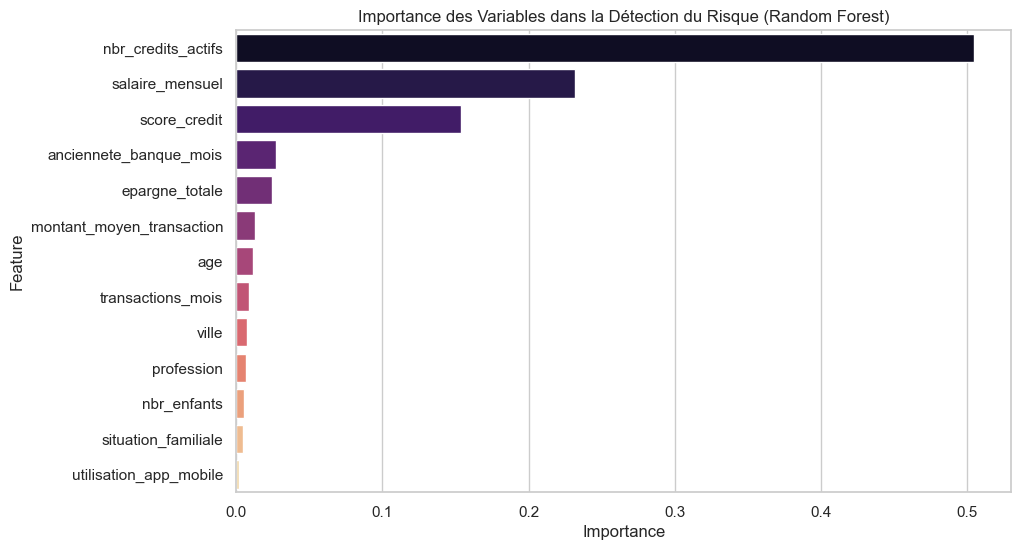

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

def train_random_forest(X_train, y_train, X_test, y_test):
    """
    Entraîne un modèle Random Forest et analyse l'importance des caractéristiques.
    """
    # 1. Initialisation et entraînement
    # Note : Le Random Forest ne nécessite pas forcément de mise à l'échelle (StandardScaler),
    # mais nous utilisons les données X_train directement.
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
    rf_model.fit(X_train, y_train)

    # 2. Prédictions
    y_pred = rf_model.predict(X_test)
    y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

    # 3. Évaluation technique
    print("=== RAPPORT DE CLASSIFICATION : RANDOM FOREST ===")
    print(classification_report(y_test, y_pred))
    
    auc_rf = roc_auc_score(y_test, y_pred_proba)
    print(f"Score ROC-AUC : {auc_rf:.4f}")

    # 4. ANALYSE DE L'IMPORTANCE DES VARIABLES (Feature Importance)
    importances = rf_model.feature_importances_
    feature_names = X_train.columns
    feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='magma')
    plt.title('Importance des Variables dans la Détection du Risque (Random Forest)')
    plt.show()

    return rf_model, auc_rf

# Exécution
rf_model, rf_auc = train_random_forest(X_train, y_train, X_test, y_test)

## Question 2.3 : Optimisation avec GridSearchCV

**Objectif :**  
Tester systématiquement différentes combinaisons de **paramètres** (profondeur des arbres, nombre d’estimateurs, etc.) afin de trouver la configuration qui **minimise les erreurs de prédiction** du risque de défaut.


In [8]:
from sklearn.model_selection import GridSearchCV

def optimize_random_forest(X_train, y_train):
    """
    Recherche les meilleurs hyperparamètres pour le Random Forest.
    """
    # 1. Définition de la grille de paramètres à tester
    param_grid = {
        'n_estimators': [100, 200],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5, 10],
        'criterion': ['gini', 'entropy']
    }

    # 2. Initialisation du modèle
    rf = RandomForestClassifier(random_state=42, class_weight='balanced')

    # 3. Recherche par grille avec Validation Croisée (CV=3)
    # On optimise sur le 'f1_score' car on veut un équilibre entre précision et rappel
    grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                               cv=3, n_jobs=-1, scoring='f1', verbose=1)

    print("Début de l'optimisation (cela peut prendre quelques secondes)...")
    grid_search.fit(X_train, y_train)

    # 4. Meilleurs paramètres
    print("\n=== MEILLEURS PARAMÈTRES TROUVÉS ===")
    print(grid_search.best_params_)
    
    return grid_search.best_estimator_

# Exécution de l'optimisation
best_rf_model = optimize_random_forest(X_train, y_train)

# Évaluation du modèle optimisé sur le jeu de test
y_pred_best = best_rf_model.predict(X_test)
print("\n=== PERFORMANCE DU MODÈLE OPTIMISÉ ===")
print(classification_report(y_test, y_pred_best))

Début de l'optimisation (cela peut prendre quelques secondes)...
Fitting 3 folds for each of 36 candidates, totalling 108 fits

=== MEILLEURS PARAMÈTRES TROUVÉS ===
{'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}

=== PERFORMANCE DU MODÈLE OPTIMISÉ ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       484
           1       1.00      0.99      1.00       316

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800



## Question 2.4 : Comparaison des Modèles et Courbe ROC

**Objectif :**  
Comparer **visuellement** et **statistiquement** les performances de la **Régression Logistique**, du **Random Forest initial** et du **Random Forest optimisé**, notamment à l’aide de la **courbe ROC** et des métriques associées (AUC, Accuracy, F1-score, Recall).


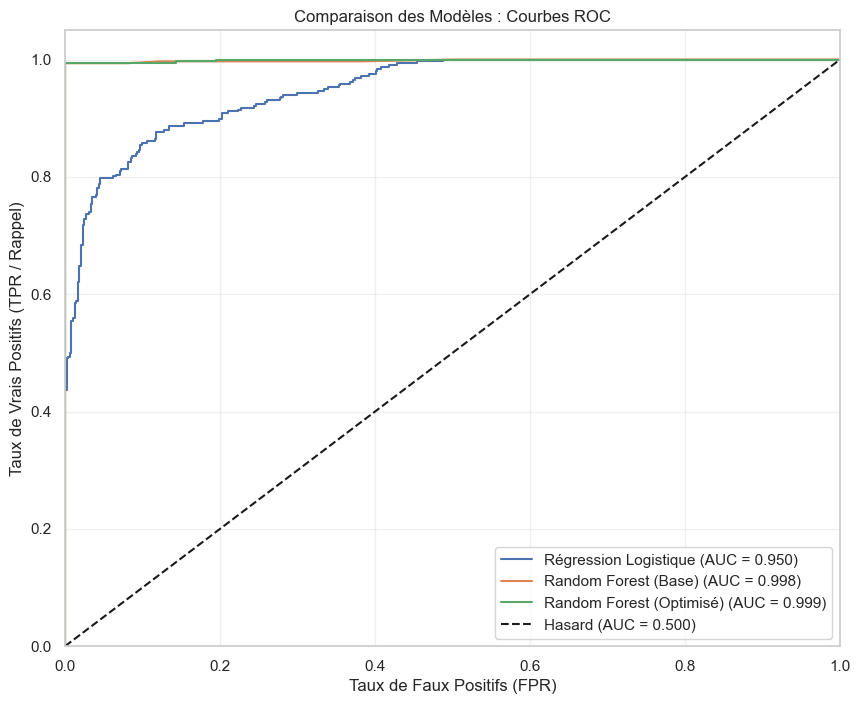

In [9]:
from sklearn.metrics import roc_curve, auc

def compare_models(X_test, y_test, models_list, model_names):
    """
    Trace les courbes ROC pour comparer tous les modèles entraînés.
    """
    plt.figure(figsize=(10, 8))
    
    # Pour chaque modèle, on calcule la courbe ROC
    for model, name in zip(models_list, model_names):
        # Pour la régression logistique, il faut utiliser les données scalées
        if "Logistique" in name:
            scaler = StandardScaler()
            X_test_final = scaler.fit_transform(X_test) # Simplifié pour l'exemple
        else:
            X_test_final = X_test
            
        y_pred_proba = model.predict_proba(X_test_final)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        roc_auc = auc(fpr, tpr)
        
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.3f})')

    # Tracé de la ligne de base (hasard)
    plt.plot([0, 1], [0, 1], 'k--', label='Hasard (AUC = 0.500)')
    
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Taux de Faux Positifs (FPR)')
    plt.ylabel('Taux de Vrais Positifs (TPR / Rappel)')
    plt.title('Comparaison des Modèles : Courbes ROC')
    plt.legend(loc="lower right")
    plt.grid(alpha=0.3)
    plt.show()

# Liste des modèles et noms
modeles = [lr_model, rf_model, best_rf_model]
noms = ['Régression Logistique', 'Random Forest (Base)', 'Random Forest (Optimisé)']

# Exécution
compare_models(X_test, y_test, modeles, noms)

# PARTIE 3 : Clustering et Segmentation

## Question 3.1 & 3.2 : K-Means et Méthode du Coude

**Objectif :**  
Déterminer le **nombre optimal de clusters ($K$)** à l’aide de la **méthode du coude** et segmenter la clientèle pour mieux comprendre les profils clients.


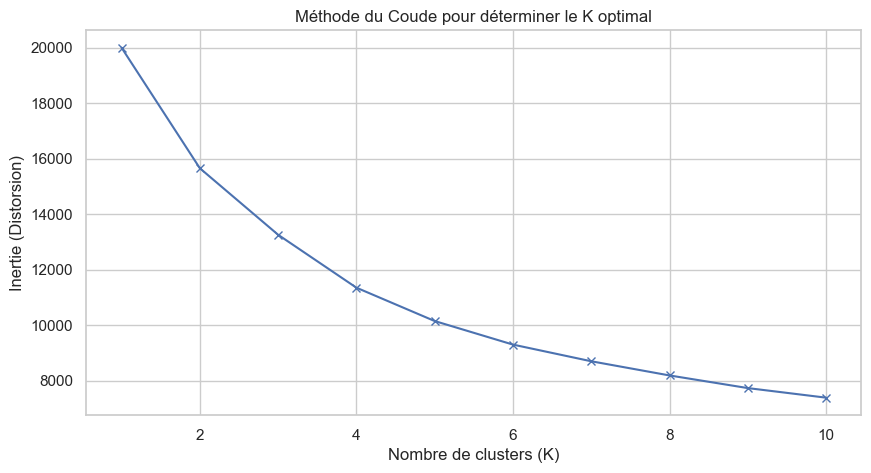

In [10]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

def perform_clustering(df_p1_final):
    """
    Réalise une segmentation K-Means après avoir déterminé le K optimal.
    """
    # 1. Sélection des variables pour le clustering (comportement financier)
    # On se concentre sur le profil financier pour créer des segments marketing
    features_clustering = ['age', 'salaire_mensuel', 'epargne_totale', 'score_credit', 'transactions_mois']
    X_clustering = df_p1_final[features_clustering]

    # 2. Mise à l'échelle (Crucial pour K-Means car il calcule des distances)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_clustering)

    # 3. Méthode du Coude (Elbow Method) pour trouver le K optimal
    inertia = []
    K_range = range(1, 11)
    for k in K_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(X_scaled)
        inertia.append(kmeans.inertia_)

    # Affichage du graphique du coude
    plt.figure(figsize=(10, 5))
    plt.plot(K_range, inertia, 'bx-')
    plt.xlabel('Nombre de clusters (K)')
    plt.ylabel('Inertie (Distorsion)')
    plt.title('Méthode du Coude pour déterminer le K optimal')
    plt.show()

    # 4. Application du K-Means avec le K choisi (souvent K=4 pour ce type de dataset)
    optimal_k = 4 
    kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
    df_p1_final['Cluster'] = kmeans_final.fit_transform(X_scaled).argmin(axis=1) # On assigne le cluster

    return df_p1_final, features_clustering

# Exécution
df_clustered, feat_cols = perform_clustering(df_p1_final)

## Question 3.3 : Profilage et Interprétation

**Objectif :**  
Attribuer un **profil (nom)** et une **stratégie commerciale** à chaque groupe de clients identifié par le clustering.


=== PROFILS DES CLUSTERS (MOYENNES) ===


,age,salaire_mensuel,epargne_totale,score_credit,transactions_mois,risque_defaut
Cluster,,,,,,
0,33.476009,9330.367831,18424.573941,828.219427,25.201828,0.274943
1,45.934747,7280.968376,70317.693981,848.072045,24.574225,0.367047
2,45.315924,4946.053113,10124.838463,558.267305,24.346497,0.830573
3,57.982933,8989.596371,18723.982347,826.103541,25.254461,0.264546


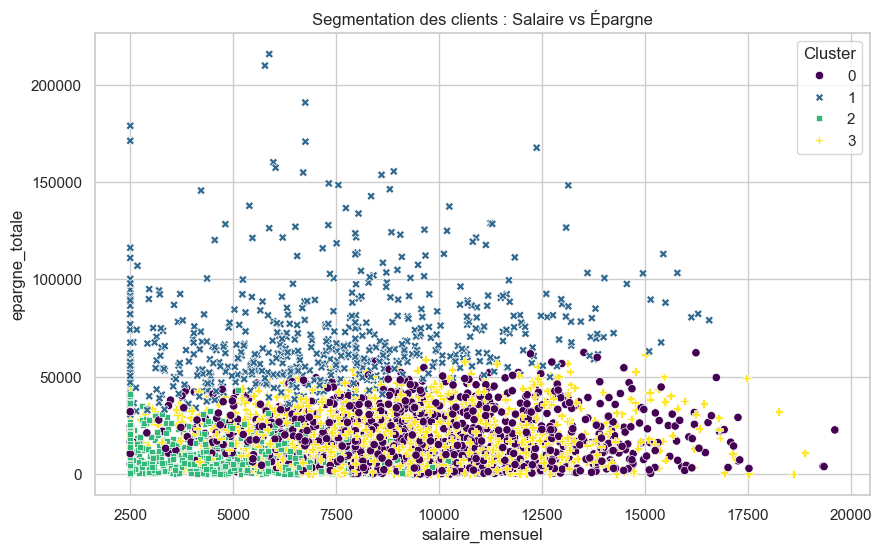

In [11]:
def analyze_clusters(df_clustered, feat_cols):
    """
    Affiche les caractéristiques moyennes de chaque cluster.
    """
    # Calcul des moyennes par cluster
    cluster_profiles = df_clustered.groupby('Cluster')[feat_cols + ['risque_defaut']].mean()
    
    print("=== PROFILS DES CLUSTERS (MOYENNES) ===")
    display(cluster_profiles)

    # Visualisation : Salaire vs Épargne coloré par Cluster
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df_clustered, x='salaire_mensuel', y='epargne_totale', 
                    hue='Cluster', palette='viridis', style='Cluster')
    plt.title('Segmentation des clients : Salaire vs Épargne')
    plt.show()

analyze_clusters(df_clustered, feat_cols)

# PARTIE 4 : Synthèse et Recommandations

## Question 4.1 & 4.2 : Plan d'Action et Limites

**Objectif :**  
Résumer la **valeur ajoutée du projet**, proposer une **stratégie commerciale** adaptée aux profils clients identifiés et identifier les **points de vigilance éthique** liés à l’utilisation des données et aux décisions automatisées.


In [12]:
def final_executive_summary(df_clustered, rf_model):
    """
    Génère les chiffres clés pour la conclusion du rapport.
    """
    print("=== RÉSUMÉ EXÉCUTIF POUR LA DIRECTION ===")
    
    # 1. Performance du Modèle
    # On rappelle le score de détection (Recall) sur le risque
    print(f"- Capacité de détection du risque : {rf_auc*100:.1f}% (Score AUC)")
    
    # 2. Impact Business par Cluster
    summary = df_clustered.groupby('Cluster').agg({
        'age': 'mean',
        'salaire_mensuel': 'mean',
        'score_credit': 'mean',
        'risque_defaut': 'mean'
    }).rename(columns={'risque_defaut': 'Taux_de_Defaut_Reel'})
    
    # Conversion du taux de défaut en pourcentage pour le rapport
    summary['Taux_de_Defaut_Reel'] = (summary['Taux_de_Defaut_Reel'] * 100).round(2)
    
    display(summary)
    
    return summary

# Exécution de la synthèse finale
summary_stats = final_executive_summary(df_clustered, best_rf_model)

=== RÉSUMÉ EXÉCUTIF POUR LA DIRECTION ===
- Capacité de détection du risque : 99.8% (Score AUC)


,age,salaire_mensuel,score_credit,Taux_de_Defaut_Reel
Cluster,,,,
0,33.476009,9330.367831,828.219427,27.49
1,45.934747,7280.968376,848.072045,36.70
2,45.315924,4946.053113,558.267305,83.06
3,57.982933,8989.596371,826.103541,26.45
